In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


In [65]:
#read data and clean
url= r"https://github.com/JachiOzoh/Data-Analysis-Projects/blob/main/restaurant_survey_eda_data.csv?raw=true"

def read_n_clean(url):
    df = pd.read_csv(url)
    #removing whitespace from headers. Noticed whitespace in the column header 'Alcohol'. Initially, 'Alcohol '
    print("Removing whitespace from headers...")
    df=df.rename(columns=lambda x: x.rstrip())
    print("Creating new columns...")
    df['Location']=df['Location'].replace('Central Park,ny','Central Park,NY')
    df['Location']=df['Location'].replace('Market City, MY','Market City, NY')
    df['Age'] = 2025 - df['YOB']
    bins=['Teens','Twenties','Thirties','Forties','Fifties','Sixties','Seventies']
    bins_edges=range(0,71,10)
    df['Age Group']=pd.cut(df['Age'],bins=bins_edges,labels=bins)
    return df
df=read_n_clean(url)

Removing whitespace from headers...
Creating new columns...


In [39]:
def create_numerized_dataframe(df):
    df_num = df.copy()
    for col in df_num.columns:
        if(df_num[col].dtype == 'category'):
            df_num[col] = df_num[col].cat.codes
        elif(df_num[col].dtype == 'object'):
            df_num[col]= df_num[col].astype('category')
            df_num[col] = df_num[col].cat.codes
    return df_num
df_num=create_numerized_dataframe(df)
df_num

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age Group
0,1,153,6,0,2006,2,0,3,5,0,0,5,4,4.5,0,19,1
1,2,123,5,0,1991,1,1,3,3,0,2,1,1,1.0,0,34,3
2,3,122,7,1,1977,2,1,5,6,1,1,5,5,5.0,1,48,4
3,4,153,6,0,1956,1,0,5,5,0,2,3,1,2.0,0,69,6
4,5,129,1,1,1997,2,1,4,1,2,0,2,4,3.0,0,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,5,0,1982,2,0,4,2,0,2,1,2,1.5,0,43,4
196,197,170,7,0,2000,1,1,4,0,0,1,1,2,1.5,0,25,2
197,198,160,5,0,2006,2,0,5,5,0,1,5,2,3.5,0,19,1
198,199,130,5,1,2002,1,1,3,1,0,2,3,2,2.5,0,23,2


## Data Validation

In [40]:
def validate_data(df):
    # Extract info about dataset
    dataframe_info={
    "info":df.info(),
    "shape":df.shape,
    "describe":df.describe(),
    "null_count":df.isnull().sum(),
    }
    return dataframe_info
v=validate_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   User ID         200 non-null    int64   
 1   Area code       200 non-null    int64   
 2   Location        200 non-null    object  
 3   Gender          200 non-null    object  
 4   YOB             200 non-null    int64   
 5   Marital Status  200 non-null    object  
 6   Activity        200 non-null    object  
 7   Budget          200 non-null    int64   
 8   Cuisines        200 non-null    object  
 9   Alcohol         200 non-null    object  
 10  Smoker          200 non-null    object  
 11  Food Rating     200 non-null    int64   
 12  Service Rating  200 non-null    int64   
 13  Overall Rating  200 non-null    float64 
 14  Often A S       200 non-null    object  
 15  Age             200 non-null    int64   
 16  Age Group       200 non-null    category
dtypes: category(1), 

In [41]:
v.get("null_count")

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
Age               0
Age Group         0
dtype: int64

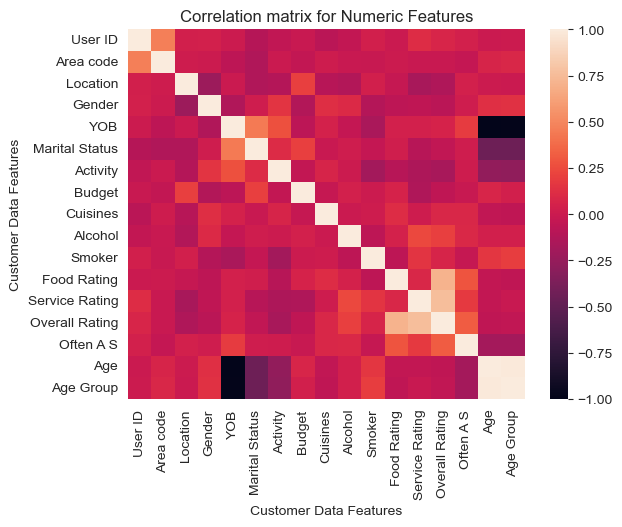

In [42]:
c_matrix = df_num.corr()

sns.heatmap(c_matrix)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Customer Data Features")
plt.ylabel("Customer Data Features")
plt.show()

## Age Analysis

In [43]:
print(f'The minumum customer age is {df['Age'].min()}')
print(f'The maximum customer age is {df['Age'].max()}')

The minumum customer age is 16
The maximum customer age is 70


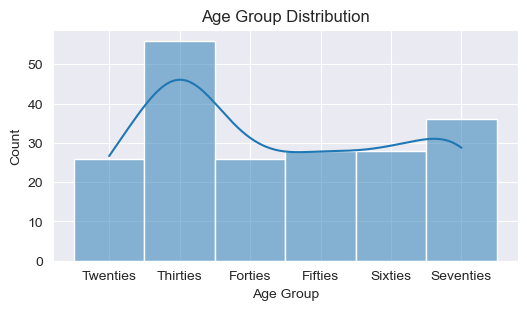

In [44]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age Group', kde=True)
plt.title("Age Group Distribution")
plt.show()

The most common age group of restaurant customers is the 'Thirties' age group

In [45]:
df['Age'].mean()

40.17

## Gender Analysis 

In [46]:
ismale=df['Gender']=='Male'
isfemale=df['Gender']=='Female'
print(f'total male customers: {ismale.sum()}')
print(f'total female customers: {isfemale.sum()}')

total male customers: 118
total female customers: 82


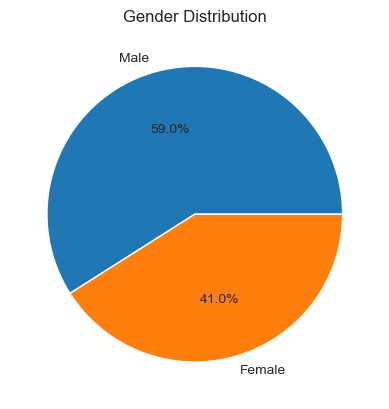

In [47]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

The pie chart above shows that most of the restaurant customers are male.

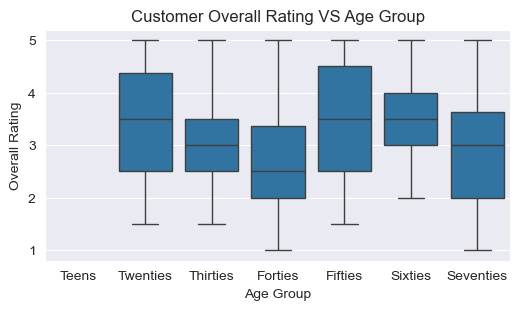

In [48]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Age Group', y='Overall Rating')
plt.title('Customer Overall Rating VS Age Group')
plt.show()

## Customer Habits Analysis

In [49]:
print(df['Alcohol'].unique())
print(df['Smoker'].unique())

['Never' 'Often' 'Socially']
['Never' 'Socially' 'Often']


<Axes: xlabel='Gender', ylabel='Overall Rating'>

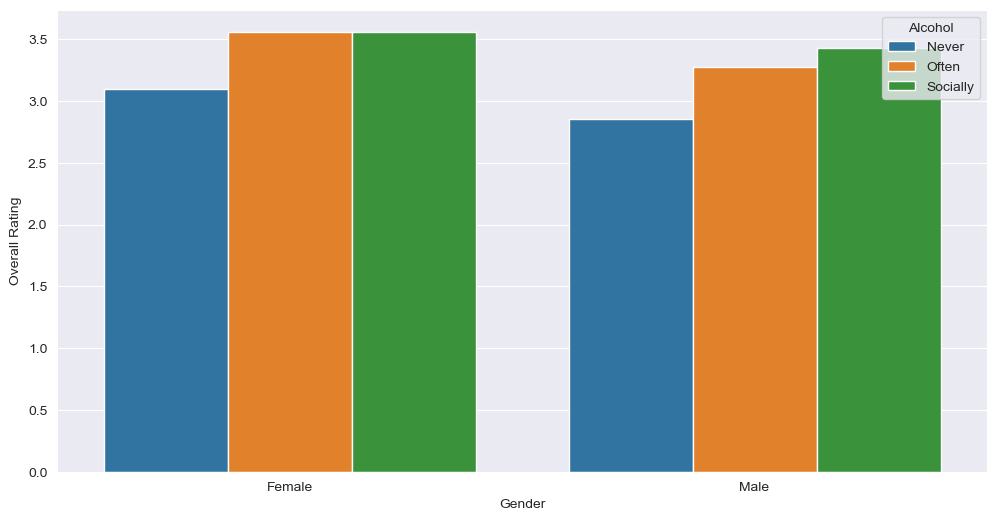

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Overall Rating', hue='Alcohol', errorbar=None)

<Axes: xlabel='Gender', ylabel='Overall Rating'>

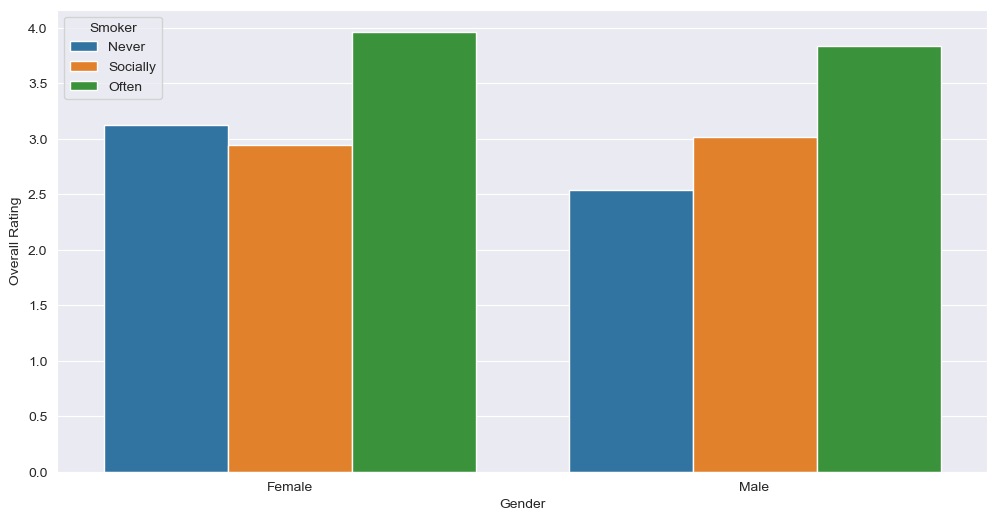

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Overall Rating', hue='Smoker', errorbar=None)

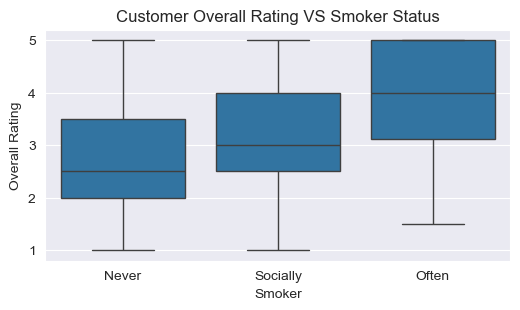

In [52]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Overall Rating')
plt.title('Customer Overall Rating VS Smoker Status')
plt.show()

This shows that people who smoke often, give higer ratings on average than social smokers or non-smokers.

In [53]:
df.groupby('Smoker')['Overall Rating'].mean()

Smoker
Never       2.737288
Often       3.885714
Socially    2.978873
Name: Overall Rating, dtype: float64

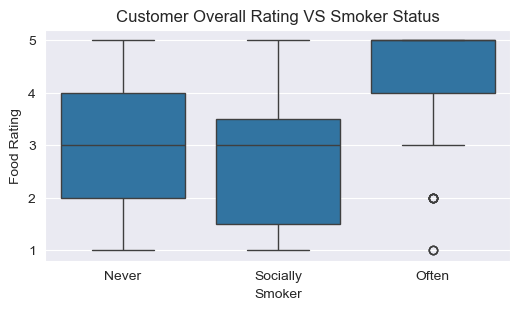

In [54]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Food Rating')
plt.title('Customer Overall Rating VS Smoker Status')
plt.show()

In [55]:
df.groupby('Smoker')['Food Rating'].mean()

Smoker
Never       2.830508
Often       4.100000
Socially    2.676056
Name: Food Rating, dtype: float64

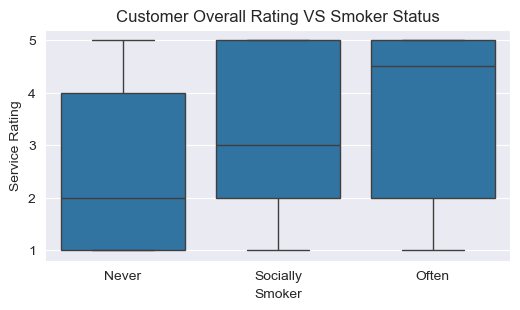

In [56]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Service Rating')
plt.title('Customer Overall Rating VS Smoker Status')
plt.show()

In [57]:
df.groupby('Smoker')['Service Rating'].mean()

Smoker
Never       2.644068
Often       3.671429
Socially    3.281690
Name: Service Rating, dtype: float64

People who smoke often seem to rate the restaurant higher. On average, smokers rate the restaurant a full rating point higher than non-smokers and social smokers. This warrants further investigation. 

## Cuisine Analysis

In [58]:
df['Cuisines'].value_counts()

Cuisines
Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

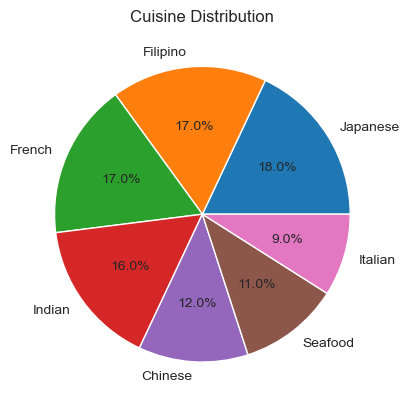

In [59]:
# autopct controls the format of the percentages on the pie chart. first
cuisine_counts = df['Cuisines'].value_counts()
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.01f%%')
plt.title('Cuisine Distribution')
plt.show()

According to the data, Japanese cuisine is the most popular among restaurant customers. Italian, however, is unpopular among customers

In [60]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age Group
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,19,Twenties
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,34,Forties
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,48,Fifties
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,69,Seventies
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,28,Thirties


In [61]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Cedar Hill, NY'], dtype=object)

In [62]:
df.groupby('Location')['User ID'].count()

Location
Cedar Hill, NY         2
Central Park,NY       32
China Town, NY        22
Market City, NY       22
Riverdale,NY          28
St. George,NY         46
Upper East Side,NY    30
Upper West Side,NY    18
Name: User ID, dtype: int64

Text(0.5, 1.0, 'Location Distribution')

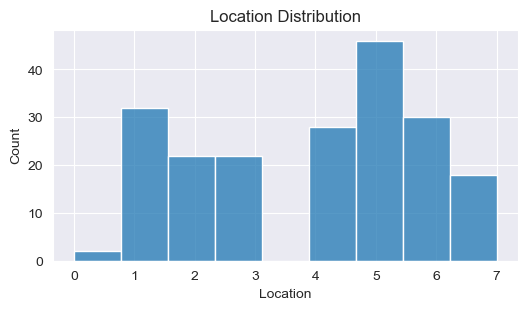

In [63]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df_num, x='Location' )
plt.title('Location Distribution')

In [64]:
df.merge(df_num, on='User ID', suffixes=('_df','_code'))[['Location_df','Location_code']].drop_duplicates()

,Location_df,Location_code
0,"Upper East Side,NY",6
1,"St. George,NY",5
2,"Upper West Side,NY",7
4,"Central Park,NY",1
5,"China Town, NY",2
8,"Riverdale,NY",4
23,"Market City, NY",3
90,"Cedar Hill, NY",0
